In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../dataset/kalimati.csv")

In [3]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,2,Potato Red,6/16/2013,Kg,20,21,20.5
3,3,Potato White,6/16/2013,Kg,15,16,15.5
4,4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [4]:
df = df.drop(columns=["Minimum", "Maximum", "Unit", "SN"])

In [5]:
df = df.rename(columns={"Average": "Price"})

In [6]:
df.head()

,Commodity,Date,Price
0,Tomato Big(Nepali),6/16/2013,37.5
1,Tomato Small(Local),6/16/2013,29.0
2,Potato Red,6/16/2013,20.5
3,Potato White,6/16/2013,15.5
4,Onion Dry (Indian),6/16/2013,29.0


In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.head()

,Commodity,Date,Price
0,Tomato Big(Nepali),2013-06-16,37.5
1,Tomato Small(Local),2013-06-16,29.0
2,Potato Red,2013-06-16,20.5
3,Potato White,2013-06-16,15.5
4,Onion Dry (Indian),2013-06-16,29.0


In [9]:
df = df[["Date", "Commodity", "Price"]]

In [10]:
df.head()

,Date,Commodity,Price
0,2013-06-16,Tomato Big(Nepali),37.5
1,2013-06-16,Tomato Small(Local),29.0
2,2013-06-16,Potato Red,20.5
3,2013-06-16,Potato White,15.5
4,2013-06-16,Onion Dry (Indian),29.0


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Item"] = label_encoder.fit_transform(df["Commodity"])


In [12]:
df.head()

,Date,Commodity,Price,Item
0,2013-06-16,Tomato Big(Nepali),37.5,122
1,2013-06-16,Tomato Small(Local),29.0,124
2,2013-06-16,Potato Red,20.5,96
3,2013-06-16,Potato White,15.5,99
4,2013-06-16,Onion Dry (Indian),29.0,83


In [13]:
df = df.drop(columns=["Commodity"])

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Price'] = scaler.fit_transform(df[['Price']])


In [15]:
df.head()

,Date,Price,Item
0,2013-06-16,0.017150,122
1,2013-06-16,0.012665,124
2,2013-06-16,0.008179,96
3,2013-06-16,0.005541,99
4,2013-06-16,0.012665,83


In [16]:
train = df[(df["Date"] >= "2013-06-16") & (df["Date"] <= "2019-12-31")]
test = df[(df["Date"] >= "2020-01-01") & (df["Date"] <= "2021-05-13")]


In [17]:
train.head()

,Date,Price,Item
0,2013-06-16,0.017150,122
1,2013-06-16,0.012665,124
2,2013-06-16,0.008179,96
3,2013-06-16,0.005541,99
4,2013-06-16,0.012665,83


In [18]:
test.head()

,Date,Price,Item
157439,2020-01-01,0.030343,122
157440,2020-01-01,0.030343,121
157441,2020-01-01,0.018470,124
157442,2020-01-01,0.018470,126
157443,2020-01-01,0.019789,123


In [19]:
train.to_csv("../dataset/processed/train.csv", index=False)
test.to_csv("../dataset/processed/test.csv", index=False)


In [20]:
print(train.shape, test.shape, df.shape)



(157439, 3) (39722, 3) (197161, 3)


In [21]:
train.Item.nunique(), test.Item.nunique()

(128, 131)

In [22]:
train["Date"].min(), train["Date"].max(), test["Date"].min(), test["Date"].max()

(Timestamp('2013-06-16 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-05-13 00:00:00'))

In [23]:
df.groupby(["Item"]).agg(
    {"Price": ["count", "sum", "mean", "median", "std", "min", "max"]}
)

Price                                                              
     count         sum      mean    median       std       min       max
Item                                                                    
0      395   57.327177  0.145132  0.150396  0.021067  0.073879  0.179420
1     2683  166.054090  0.061891  0.052770  0.019378  0.026385  0.150396
2     2020   40.082586  0.019843  0.019789  0.004748  0.003166  0.032982
3     1055  176.286280  0.167096  0.158311  0.078344  0.031662  1.000000
4     1131   37.043272  0.032753  0.031662  0.012431  0.007388  0.063325
...    ...         ...       ...       ...       ...       ...       ...
127    420   11.745119  0.027965  0.027704  0.008563  0.011873  0.042216
128   2538   68.117942  0.026839  0.026385  0.008787  0.009235  0.073879
129     42    0.618470  0.014725  0.012533  0.003991  0.011346  0.025066
130   2679   58.194987  0.021723  0.022427  0.007629  0.004485  0.089710
131   1105   22.508707  0.020370  0.019789  0.007760  0.007388  0.063325

[132 rows x 7 columns]

Feature Engineering

In [24]:
import warnings

warnings.filterwarnings("ignore")


In [25]:
# Time-related feature == creating time related features


def create_date_features(df):
    df["month"] = df.Date.dt.month
    df["day_of_month"] = df.Date.dt.day
    df["day_of_year"] = df.Date.dt.dayofyear
    # df["week_of_year"] = df.Date.dt.weekofyear
    df["day_of_week"] = df.Date.dt.dayofweek + 1
    df["year"] = df.Date.dt.year
    df["is_wknd"] = (
        df.Date.dt.weekday // 4
    )  
    df["is_month_start"] = df.Date.dt.is_month_start.astype(int)
    df["is_month_end"] = df.Date.dt.is_month_end.astype(int)
    df["is_year_start"] = df.Date.dt.is_year_start.astype(int)
    df["is_year_end"] = df.Date.dt.is_year_end.astype(int)
    return df


df = create_date_features(train)


In [26]:
df.head()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,is_year_start,is_year_end
0,2013-06-16,0.017150,122,6,16,167,7,2013,1,0,0,0,0
1,2013-06-16,0.012665,124,6,16,167,7,2013,1,0,0,0,0
2,2013-06-16,0.008179,96,6,16,167,7,2013,1,0,0,0,0
3,2013-06-16,0.005541,99,6,16,167,7,2013,1,0,0,0,0
4,2013-06-16,0.012665,83,6,16,167,7,2013,1,0,0,0,0


In [27]:
df.sort_values(by=["Item", "Date"], axis=0, inplace=True)


def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))


def lag_features(dataframe, lags):
    for lag in lags:
        dataframe["price_lag_" + str(lag)] = dataframe.groupby("Item")[
            "Price"
        ].transform(lambda x: x.shift(lag)) + random_noise(
            dataframe
        )  
    return dataframe

lags_list = [91, 98, 105, 112, 119, 126, 182, 364, 546, 728]

df = lag_features(df, lags_list)



In [28]:
df.tail()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
157057,2019-12-27,0.026385,131,12,27,361,5,2019,1,0,...,-0.288605,1.154672,0.444224,-1.085304,0.271648,0.630245,0.231701,-1.033115,-1.077353,0.200260
157143,2019-12-28,0.026385,131,12,28,362,6,2019,1,0,...,1.381523,1.891172,1.326410,1.846422,2.694891,0.854696,-0.362939,-2.290286,0.514776,-0.033185
157228,2019-12-29,0.026385,131,12,29,363,7,2019,1,0,...,1.217856,-1.387634,0.139107,0.882340,0.555860,-0.446979,-0.130693,2.515753,-0.194356,0.871941
157313,2019-12-30,0.026385,131,12,30,364,1,2019,0,0,...,0.397645,-1.689397,-1.041370,1.899825,1.354401,0.698957,-0.628123,4.604656,-0.421692,0.632499
157398,2019-12-31,0.026385,131,12,31,365,2,2019,0,0,...,-1.010487,0.319749,2.894836,-1.708123,0.403430,-4.273462,0.130937,1.101884,0.218523,-1.812110


In [29]:
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe["price_roll_mean_" + str(window)] = dataframe.groupby("Item")[
            "Price"
        ].transform(
            lambda x: x.shift(1)
            .rolling(window=window, min_periods=10, win_type="triang")
            .mean()
        ) + random_noise(dataframe)
    return dataframe


roll_mean_list = [365, 546]
df = roll_mean_features(df, roll_mean_list)


In [30]:
df.tail()


,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
157057,2019-12-27,0.026385,131,12,27,361,5,2019,1,0,...,0.444224,-1.085304,0.271648,0.630245,0.231701,-1.033115,-1.077353,0.200260,0.197954,-1.499103
157143,2019-12-28,0.026385,131,12,28,362,6,2019,1,0,...,1.326410,1.846422,2.694891,0.854696,-0.362939,-2.290286,0.514776,-0.033185,-1.750394,-0.788571
157228,2019-12-29,0.026385,131,12,29,363,7,2019,1,0,...,0.139107,0.882340,0.555860,-0.446979,-0.130693,2.515753,-0.194356,0.871941,-2.206232,4.389095
157313,2019-12-30,0.026385,131,12,30,364,1,2019,0,0,...,-1.041370,1.899825,1.354401,0.698957,-0.628123,4.604656,-0.421692,0.632499,-1.028762,-0.566496
157398,2019-12-31,0.026385,131,12,31,365,2,2019,0,0,...,2.894836,-1.708123,0.403430,-4.273462,0.130937,1.101884,0.218523,-1.812110,1.316958,0.360204


In [31]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe[
                "price_ewm_alpha_" + str(alpha).replace(".", "") + "_lag_" + str(lag)
            ] = dataframe.groupby("Item")["Price"].transform(
                lambda x: x.shift(lag).ewm(alpha=alpha).mean()
            )
    return dataframe


alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

df = ewm_features(df, alphas, lags)


In [32]:
df.tail()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
157057,2019-12-27,0.026385,131,12,27,361,5,2019,1,0,...,0.012890,0.022355,0.021036,0.022427,0.022392,0.017483,0.017479,0.026334,0.014668,0.012959
157143,2019-12-28,0.026385,131,12,28,362,6,2019,1,0,...,0.012732,0.022391,0.020412,0.021768,0.022410,0.017317,0.017315,0.026360,0.013271,0.012812
157228,2019-12-29,0.026385,131,12,29,363,7,2019,1,0,...,0.012685,0.022409,0.020101,0.021438,0.022419,0.017234,0.017233,0.026372,0.011253,0.012738
157313,2019-12-30,0.026385,131,12,30,364,1,2019,0,0,...,0.013040,0.022418,0.021264,0.021273,0.022423,0.017192,0.017191,0.026379,0.010244,0.012965
157398,2019-12-31,0.026385,131,12,31,365,2,2019,0,0,...,0.012778,0.022423,0.021846,0.021850,0.022425,0.017171,0.017171,0.026382,0.009739,0.012815


In [33]:
df.shape

(157439, 70)

In [34]:
df.isnull().sum()

Date                              0
Price                             0
Item                              0
month                             0
day_of_month                      0
                              ...  
price_ewm_alpha_05_lag_180    20138
price_ewm_alpha_05_lag_270    28414
price_ewm_alpha_05_lag_365    36410
price_ewm_alpha_05_lag_546    51290
price_ewm_alpha_05_lag_728    65850
Length: 70, dtype: int64

In [33]:
# df = pd.get_dummies(df, columns=["Item"])

In [35]:
df

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
141053,2019-05-31,0.131926,0,5,31,151,5,2019,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141130,2019-06-01,0.131926,0,6,1,152,6,2019,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141203,2019-06-02,0.131926,0,6,2,153,7,2019,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141278,2019-06-03,0.131926,0,6,3,154,1,2019,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141358,2019-06-04,0.179420,0,6,4,155,2,2019,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157057,2019-12-27,0.026385,131,12,27,361,5,2019,1,0,...,0.012890,0.022355,0.021036,0.022427,0.022392,0.017483,0.017479,0.026334,0.014668,0.012959
157143,2019-12-28,0.026385,131,12,28,362,6,2019,1,0,...,0.012732,0.022391,0.020412,0.021768,0.022410,0.017317,0.017315,0.026360,0.013271,0.012812
157228,2019-12-29,0.026385,131,12,29,363,7,2019,1,0,...,0.012685,0.022409,0.020101,0.021438,0.022419,0.017234,0.017233,0.026372,0.011253,0.012738
157313,2019-12-30,0.026385,131,12,30,364,1,2019,0,0,...,0.013040,0.022418,0.021264,0.021273,0.022423,0.017192,0.017191,0.026379,0.010244,0.012965


In [36]:
df.fillna(method="ffill", inplace=True)

df.fillna(method="bfill", inplace=True)

print(df.isnull().sum())


Date                          0
Price                         0
Item                          0
month                         0
day_of_month                  0
                             ..
price_ewm_alpha_05_lag_180    0
price_ewm_alpha_05_lag_270    0
price_ewm_alpha_05_lag_365    0
price_ewm_alpha_05_lag_546    0
price_ewm_alpha_05_lag_728    0
Length: 70, dtype: int64


In [37]:
df["Price"] = np.log1p(df["Price"].values)

In [38]:
df.drop(columns=["Commodity"], inplace=True, errors="ignore")

In [39]:
#  train and validation set.
train = df.loc[(df["Date"] < "2019-01-01"), :]  # Until beginning of 2017
val = df.loc[
    (df["Date"] >= "2019-01-01") & (df["Date"] < "2019-04-01"), :
]  # First 3 months of 2019

# dropping useless column
cols = [col for col in train.columns if col not in ["Date", "id", "Price", "year"]]

Y_train = train["Price"]
X_train = train[cols]

Y_val = val["Price"]
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape


((131242,), (131242, 67), (5868,), (5868, 67))

In [40]:
train.head()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
50,2013-06-16,0.053928,1,6,16,167,7,2013,1,0,...,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409
123,2013-06-17,0.058916,1,6,17,168,1,2013,0,0,...,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409
196,2013-06-18,0.056425,1,6,18,169,2,2013,0,0,...,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409
269,2013-06-19,0.056425,1,6,19,170,3,2013,0,0,...,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409
343,2013-06-20,0.056425,1,6,20,171,4,2013,0,0,...,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409,0.055409


Lgbm Model

In [41]:
# light bgm model
import lightgbm as lgb
import shap
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from lightgbm import LGBMRegressor


In [42]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
)

In [43]:
##SMAPE score


def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


# Calculating SMAPE for LightGBM output:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return "SMAPE", smape_val, False


In [44]:
# lgbm in without any parameters
first_model = lgb.LGBMRegressor().fit(X_train, Y_train)

print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:", mean_absolute_error(Y_train, pred))
print("RMSE:", mean_squared_error(Y_train, pred))
print("R2 Score:", r2_score(Y_train, pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14936
[LightGBM] [Info] Number of data points in the train set: 131242, number of used features: 67
[LightGBM] [Info] Start training from score 0.039555
TRAIN SMAPE: 25.140395400379333
VALID SMAPE: 30.836327553881265
MAE: 0.0076017256164245045
RMSE: 0.00011862890558717887
R2 Score: 0.9060825648707515


Catboost Regressor

In [45]:
from catboost import CatBoostRegressor
second_model = CatBoostRegressor()
second_model.fit(X_train, Y_train)

print("TRAIN SMAPE:", smape(Y_train, second_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, second_model.predict(X_val)))
pred = second_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

Learning rate set to 0.088478
0:	learn: 0.0335115	total: 163ms	remaining: 2m 42s
1:	learn: 0.0317069	total: 195ms	remaining: 1m 37s
2:	learn: 0.0300913	total: 220ms	remaining: 1m 13s
3:	learn: 0.0286695	total: 244ms	remaining: 1m
4:	learn: 0.0274182	total: 270ms	remaining: 53.8s
5:	learn: 0.0262951	total: 293ms	remaining: 48.5s
6:	learn: 0.0253194	total: 318ms	remaining: 45.2s
7:	learn: 0.0244565	total: 354ms	remaining: 43.8s
8:	learn: 0.0237039	total: 377ms	remaining: 41.5s
9:	learn: 0.0230207	total: 401ms	remaining: 39.7s
10:	learn: 0.0224161	total: 429ms	remaining: 38.6s
11:	learn: 0.0219152	total: 451ms	remaining: 37.2s
12:	learn: 0.0214484	total: 485ms	remaining: 36.8s
13:	learn: 0.0210458	total: 506ms	remaining: 35.6s
14:	learn: 0.0207151	total: 529ms	remaining: 34.7s
15:	learn: 0.0204113	total: 557ms	remaining: 34.3s
16:	learn: 0.0201349	total: 585ms	remaining: 33.8s
17:	learn: 0.0198801	total: 613ms	remaining: 33.5s
18:	learn: 0.0196671	total: 643ms	remaining: 33.2s
19:	learn: 

In [46]:
from xgboost.sklearn import XGBRegressor
third_model = XGBRegressor()
third_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, third_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, third_model.predict(X_val)))
pred = third_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

TRAIN SMAPE: 18.23652129470598
VALID SMAPE: 29.57063393111178
MAE: 0.005294378248670369
RMSE: 6.149958438851744e-05
R2 Score: 0.9513113334503477


Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
fourth_model = LinearRegression()
fourth_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, fourth_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, fourth_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

TRAIN SMAPE: 35.362410729300024
VALID SMAPE: 37.16463406468023
MAE: 0.0076017256164245045
RMSE: 0.00011862890558717887
R2 Score: 0.9060825648707515


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

In [51]:
# def plot_importances(first_model, plot=False, num=10):


#     gain = first_model.booster_.feature_importance(importance_type='gain')
#     feat_imp = pd.DataFrame({'feature': first_model.feature_name_,
#                              'split': first_model.booster_.feature_importance(importance_type='split'),
#                              'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
#     if plot:
#         plt.figure(figsize=(10, 10))
#         sns.set(font_scale=1)
#         plt.title('feature')
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(feat_imp.head(num))
#         return feat_imp
# feature_imp_df = plot_importances(first_model, num=50)

Training Linear Regression...
Feature importances for Linear Regression:


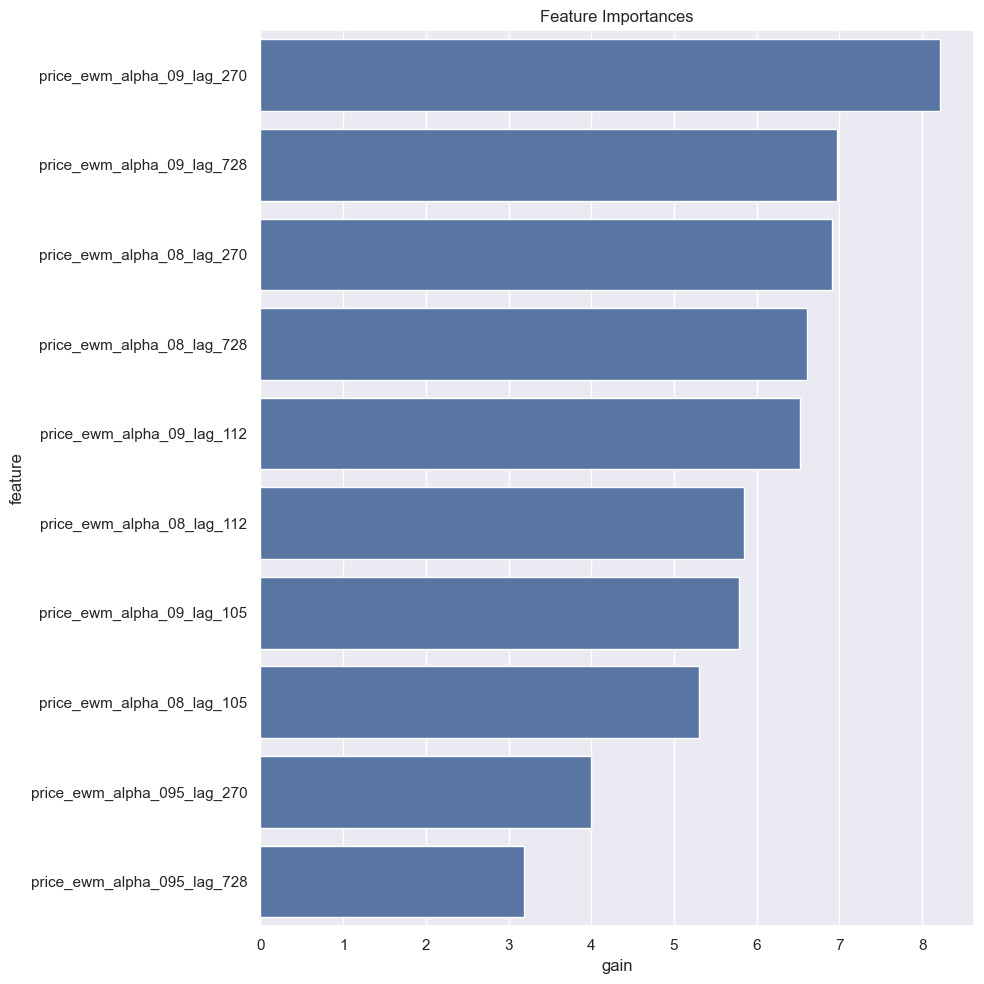

Training CatBoost...
Learning rate set to 0.088478
0:	learn: 0.0335115	total: 53.2ms	remaining: 53.2s
1:	learn: 0.0317069	total: 85.3ms	remaining: 42.6s
2:	learn: 0.0300913	total: 138ms	remaining: 45.7s
3:	learn: 0.0286695	total: 199ms	remaining: 49.6s
4:	learn: 0.0274182	total: 230ms	remaining: 45.8s
5:	learn: 0.0262951	total: 272ms	remaining: 45.1s
6:	learn: 0.0253194	total: 298ms	remaining: 42.3s
7:	learn: 0.0244565	total: 326ms	remaining: 40.5s
8:	learn: 0.0237039	total: 353ms	remaining: 38.9s
9:	learn: 0.0230207	total: 383ms	remaining: 37.9s
10:	learn: 0.0224161	total: 417ms	remaining: 37.5s
11:	learn: 0.0219152	total: 451ms	remaining: 37.2s
12:	learn: 0.0214484	total: 482ms	remaining: 36.6s
13:	learn: 0.0210458	total: 512ms	remaining: 36s
14:	learn: 0.0207151	total: 541ms	remaining: 35.5s
15:	learn: 0.0204113	total: 566ms	remaining: 34.8s
16:	learn: 0.0201349	total: 594ms	remaining: 34.3s
17:	learn: 0.0198801	total: 620ms	remaining: 33.8s
18:	learn: 0.0196671	total: 644ms	remaini

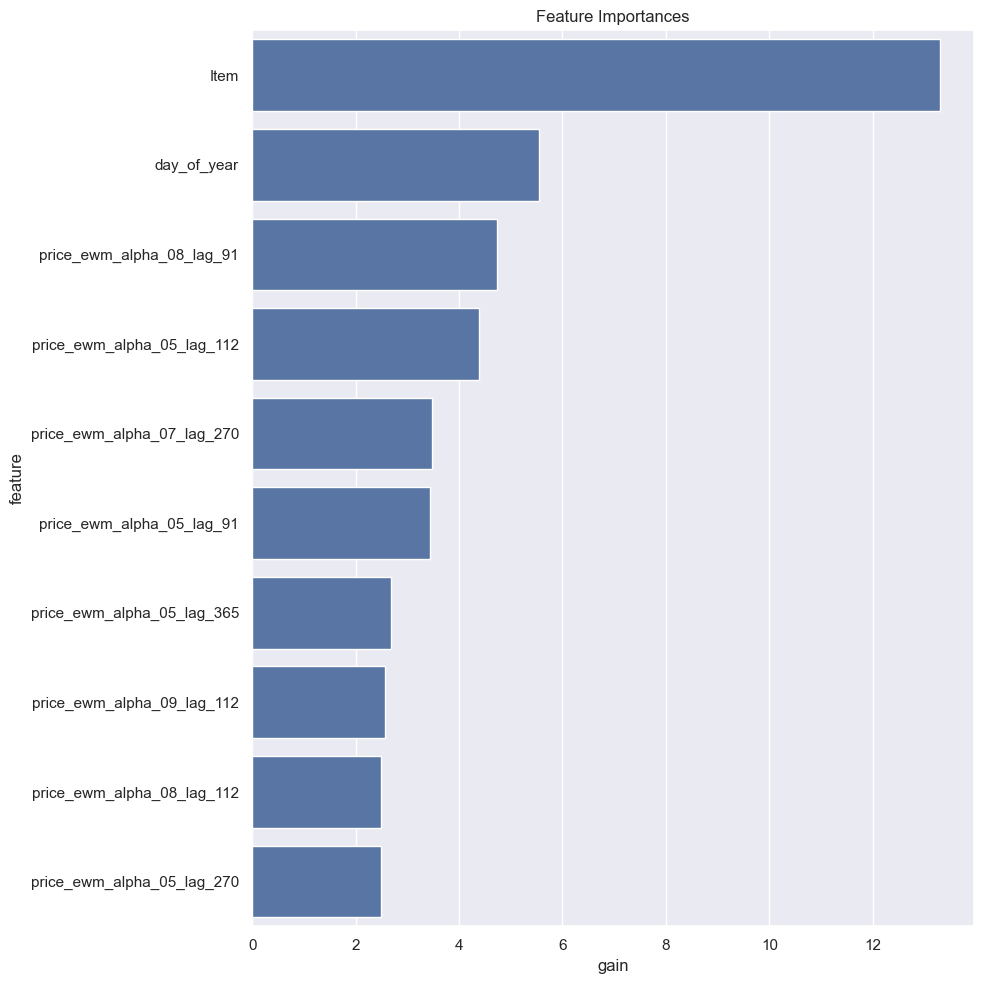

Training XGBoost...
Feature importances for XGBoost:


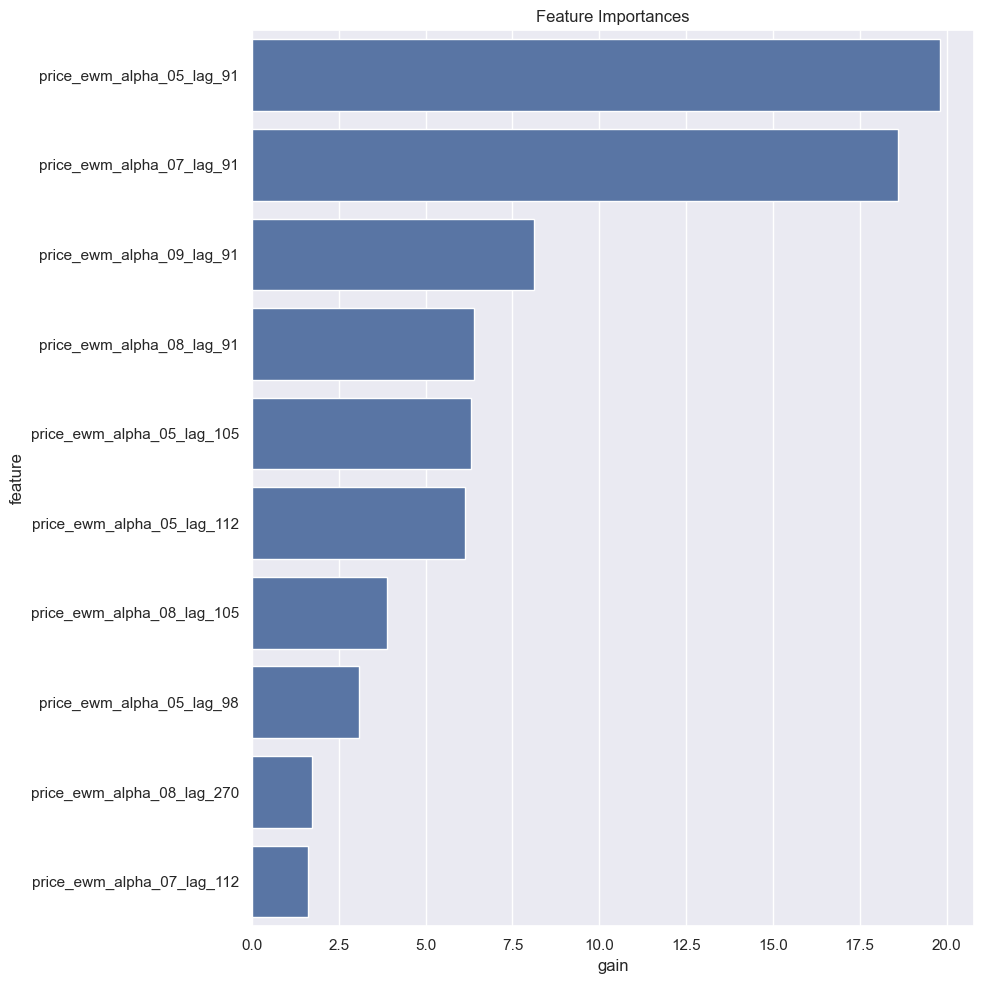

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14936
[LightGBM] [Info] Number of data points in the train set: 131242, number of used features: 67
[LightGBM] [Info] Start training from score 0.039555
Feature importances for LightGBM:


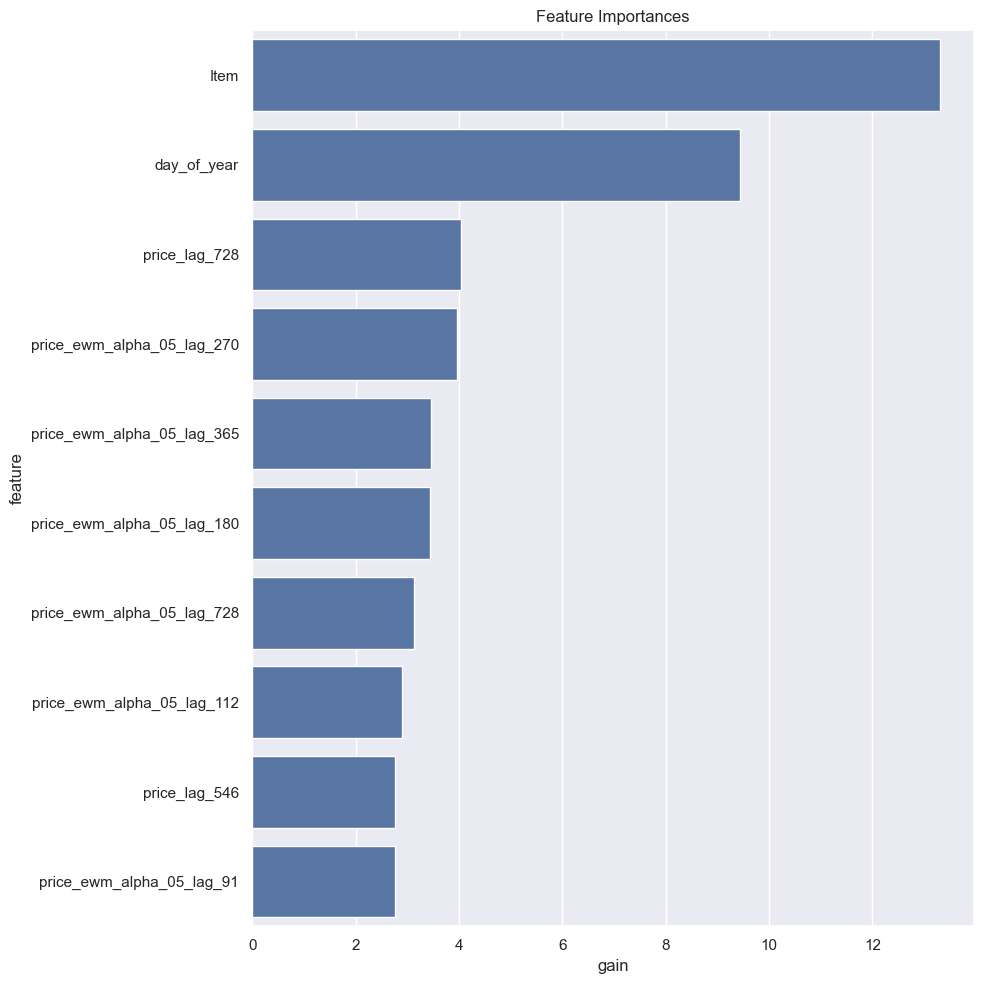

In [49]:

def plot_importances(model, X_train, plot=False, num=10):
    if hasattr(model, 'feature_importances_'):
        gain = model.feature_importances_
        feat_imp = pd.DataFrame({'feature': X_train.columns,
                                 'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    elif hasattr(model, 'coef_'):
        # Linear Regression
        gain = np.abs(model.coef_)
        feat_imp = pd.DataFrame({'feature': X_train.columns,
                                 'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    elif hasattr(model, 'get_feature_importance'):
        # CatBoost
        gain = model.get_feature_importance(type='FeatureImportance')
        feat_imp = pd.DataFrame({'feature': model.feature_names_,
                                 'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    elif hasattr(model, 'booster_'):
        # XGBoost
        booster = model.booster_
        gain = booster.get_score(importance_type='gain')
        feat_imp = pd.DataFrame({'feature': list(gain.keys()),
                                 'gain': 100 * pd.Series(list(gain.values())) / sum(gain.values())}).sort_values('gain', ascending=False)
    else:
        raise ValueError("Model type not supported for feature importances extraction")

    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x='gain', y='feature', data=feat_imp.head(num))
        plt.title('Feature Importances')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
        return feat_imp


models = {
    'Linear Regression': LinearRegression(),
    'CatBoost': CatBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, Y_train)
    print(f"Feature importances for {name}:")
    plot_importances(model, X_train, plot=True, num=10)


In [50]:
feature_imp_df = plot_importances(first_model, X_train, plot=False, num=50)

# List top features
attributes = feature_imp_df['feature'].tolist()

                        feature       gain
0                          Item  13.300000
3                   day_of_year   9.433333
19                price_lag_728   4.033333
63   price_ewm_alpha_05_lag_270   3.966667
64   price_ewm_alpha_05_lag_365   3.466667
62   price_ewm_alpha_05_lag_180   3.433333
66   price_ewm_alpha_05_lag_728   3.133333
61   price_ewm_alpha_05_lag_112   2.900000
18                price_lag_546   2.766667
58    price_ewm_alpha_05_lag_91   2.766667
65   price_ewm_alpha_05_lag_546   2.566667
30  price_ewm_alpha_095_lag_728   2.333333
28  price_ewm_alpha_095_lag_365   2.266667
27  price_ewm_alpha_095_lag_270   2.233333
26  price_ewm_alpha_095_lag_180   2.200000
55   price_ewm_alpha_07_lag_365   1.933333
60   price_ewm_alpha_05_lag_105   1.900000
29  price_ewm_alpha_095_lag_546   1.766667
57   price_ewm_alpha_07_lag_728   1.733333
22   price_ewm_alpha_095_lag_91   1.366667
35   price_ewm_alpha_09_lag_180   1.333333
48   price_ewm_alpha_08_lag_728   1.233333
54   price_

In [51]:
data=df[attributes + ['Price']]

In [52]:
data.head()

,Item,day_of_year,price_lag_728,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_728,price_ewm_alpha_05_lag_112,price_lag_546,price_ewm_alpha_05_lag_91,...,price_roll_mean_546,price_roll_mean_365,price_lag_105,is_year_start,is_month_start,is_wknd,day_of_week,is_year_end,is_month_end,Price
141053,0,151,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,0.995866,1.036465,2.184397,0,0,1,5,0,1,0.123921
141130,0,152,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,0.995866,1.036465,2.184397,0,1,1,6,0,0,0.123921
141203,0,153,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,0.995866,1.036465,2.184397,0,0,1,7,0,0,0.123921
141278,0,154,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,0.995866,1.036465,2.184397,0,0,0,1,0,0,0.123921
141358,0,155,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,0.995866,1.036465,2.184397,0,0,0,2,0,0,0.165022


In [53]:
data.isnull().sum()

Item                          0
day_of_year                   0
price_lag_728                 0
price_ewm_alpha_05_lag_270    0
price_ewm_alpha_05_lag_365    0
                             ..
is_wknd                       0
day_of_week                   0
is_year_end                   0
is_month_end                  0
Price                         0
Length: 68, dtype: int64

In [54]:
data.shape

(157439, 68)

In [55]:
dy = data['Price']
dy

141053    0.123921
141130    0.123921
141203    0.123921
141278    0.123921
141358    0.165022
            ...   
157057    0.026043
157143    0.026043
157228    0.026043
157313    0.026043
157398    0.026043
Name: Price, Length: 157439, dtype: float64

In [56]:
dx = data.drop(['Price'],axis = 1)
dx

,Item,day_of_year,price_lag_728,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_728,price_ewm_alpha_05_lag_112,price_lag_546,price_ewm_alpha_05_lag_91,...,day_of_month,price_roll_mean_546,price_roll_mean_365,price_lag_105,is_year_start,is_month_start,is_wknd,day_of_week,is_year_end,is_month_end
141053,0,151,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,31,0.995866,1.036465,2.184397,0,0,1,5,0,1
141130,0,152,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,1,0.995866,1.036465,2.184397,0,1,1,6,0,0
141203,0,153,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,2,0.995866,1.036465,2.184397,0,0,1,7,0,0
141278,0,154,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,3,0.995866,1.036465,2.184397,0,0,0,1,0,0
141358,0,155,3.026634,0.055409,0.055409,0.055409,0.055409,0.055409,-3.335583,0.055409,...,4,0.995866,1.036465,2.184397,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157057,131,361,0.200260,0.017479,0.026334,0.017483,0.012959,0.022392,-1.077353,0.022355,...,27,-1.499103,0.197954,0.444224,0,0,1,5,0,0
157143,131,362,-0.033185,0.017315,0.026360,0.017317,0.012812,0.022410,0.514776,0.022391,...,28,-0.788571,-1.750394,1.326410,0,0,1,6,0,0
157228,131,363,0.871941,0.017233,0.026372,0.017234,0.012738,0.022419,-0.194356,0.022409,...,29,4.389095,-2.206232,0.139107,0,0,1,7,0,0
157313,131,364,0.632499,0.017191,0.026379,0.017192,0.012965,0.022423,-0.421692,0.022418,...,30,-0.566496,-1.028762,-1.041370,0,0,0,1,0,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
dx_train,dx_test,dy_train,dy_test = train_test_split(dx,dy,test_size = 0.3,random_state = 0)

Hyperparameter tuning for Linear Regression

In [58]:
# Normalize 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dx_train_scaled = scaler.fit_transform(dx_train)
dx_test_scaled = scaler.transform(dx_test)

In [59]:
lr = RandomizedSearchCV(LinearRegression(),{
    'fit_intercept': [True, False],
    'copy_X': [True, False],
},
                       cv = 5,
                       return_train_score = False,
                       n_iter = 2)
lr.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(lr.best_params_)
print("")
print("The best score:")
print(lr.best_score_)

The best hyperparameters :
{'fit_intercept': True, 'copy_X': True}

The best score:
0.6128965640505553


In [60]:
sec_model = LinearRegression(fit_intercept =   False, copy_X = False)
sec_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, sec_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, sec_model.predict(dx_test)))
pred = sec_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

TRAIN SMAPE: 8.14413227640775
VALID SMAPE: 8.224623829671321
MAE: 0.3350191124721505
RMSE: 0.19301539099288373
R2 Score: 0.6003708664628856


In [61]:

sec_model = LinearRegression()
sec_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, sec_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, sec_model.predict(dx_test)))
pred = sec_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

TRAIN SMAPE: 7.9831855820309725
VALID SMAPE: 8.070374305162472
MAE: 0.32833396324045444
RMSE: 0.18597037851188286
R2 Score: 0.6149572277839077



Hyperparameter tuning for Catboost

In [62]:
cv = ShuffleSplit(n_splits = 2, test_size = .33, random_state = 10)

cb = RandomizedSearchCV(CatBoostRegressor(),{ 
        "objective": ["RMSE", "MAE","MAPE"],
        'learning_rate' :[0.005,0.01,0.015,0.02,0.025,0.03],
        "colsample_bylevel":[0.1,0.2,0.3,0.4,0.5],
        "max_depth": [3,6,9,12,15],
        "boosting_type":["Ordered", "Plain"],
        "bootstrap_type":["Bayesian", "Bernoulli", "MVS"],
        "iterations": [30, 50, 100]
},
                       cv = cv,
                       verbose = 2,
                       #random_state = 42,
                       return_train_score = False,
                       n_jobs = -1,
                       n_iter = 100)
cb.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(cb.best_params_)
print("")
print("The best score:")
print(cb.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits



KeyboardInterrupt



In [ ]:
sec_model = CatBoostRegressor(objective='RMSE', 
                                         max_depth= 15, 
                                         learning_rate= 0.03, 
                                         iterations= 100, 
                                         colsample_bylevel= 0.4, 
                                         bootstrap_type='MVS', 
                                         boosting_type='Ordered')
sec_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, sec_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, sec_model.predict(dx_test)))
pred = sec_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

Hyperparameter tuning for LightGBM

In [62]:
cv = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 42)

lg = RandomizedSearchCV(lgb.LGBMRegressor() ,{
       'max_depth':range(3,12),
       'num_leaves': range(50,200),#sets numbeer of nodes per tree
       'num_estimators':[200,400,600,800,1000,1400],#number of trees
       'learning_rate':[0.01,0.02,0.03,0.04],
       'max_bin':range(100,300),
       'min_gain_to_split':range(3,15),
       'lambda_l1': [0,1,3,5],
       'lambda_l2': [0,1,3,5]#specifies L1 or L2 regularization
      },               cv = cv,
                       verbose = 2,
                       random_state = 42,
                       return_train_score = False,
                       n_jobs = -1,
                       n_iter = 200)
lg.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(lg.best_params_)
print("")
print("The best score:")
print(lg.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

In [63]:
sec_model = lgb.LGBMRegressor(num_leaves= 150, 
                                         num_estimators=1000, 
                                         min_gain_to_split=3, 
                                         max_depth= 11, 
                                         max_bin=176, 
                                         learning_rate=0.04, 
                                         lambda_l2 = 5, 
                                         lambda_l1= 1)
sec_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, sec_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, sec_model.predict(dx_test)))
pred = sec_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] min_gain_to_split is set=3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10397
[LightGBM] [Info] Number of data points in the train se


Error1 - LightGBM

In [59]:
error1 = pd.DataFrame({
    "Date":val.Date,
    "Item":X_val.Item,
    "actual":Y_val,
    "pred":first_model.predict(X_val)
}).reset_index(drop = True)

error1["error"] = np.abs(error1.actual-error1.pred)

In [60]:

error1.sort_values("error", ascending=False).head(5)

,Date,Item,actual,pred,error
1760,2019-01-03,33,0.119248,0.038383,0.080865
5368,2019-02-01,120,0.114553,0.038379,0.076174
5344,2019-01-08,120,0.114553,0.039095,0.075458
3303,2019-01-05,74,0.133202,0.065777,0.067425
3302,2019-01-04,74,0.133202,0.065777,0.067424


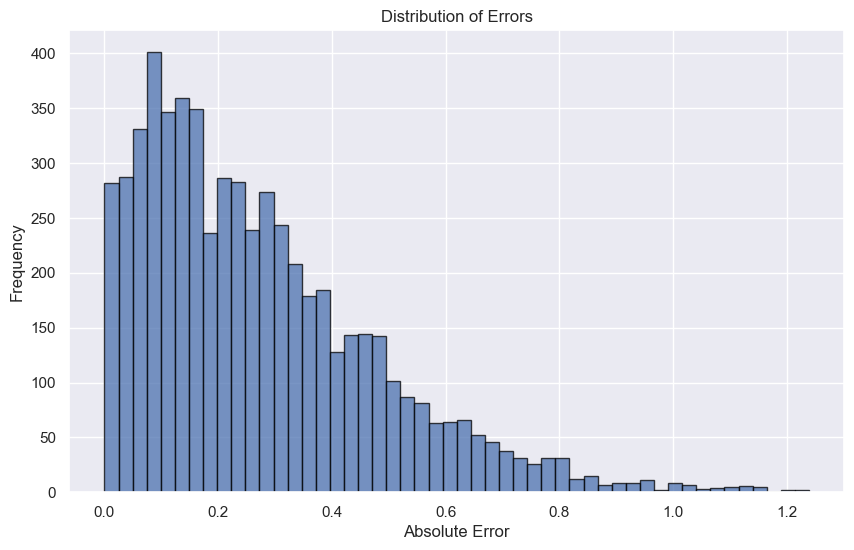

In [66]:
# Histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(error1['error'], bins=50, alpha=0.75, edgecolor='black')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

In [61]:
error1[["actual", "pred", "error"]].describe([0.7, 0.8, 0.9, 0.95, 0.99]).T

,count,mean,std,min,50%,70%,80%,90%,95%,99%,max
actual,5868.0,0.038521,0.028352,2.108593e-03,0.027328,0.047659,0.056425,0.076179,0.105097,0.127411,0.156034
pred,5868.0,0.036993,0.023217,6.671884e-03,0.030044,0.041167,0.051028,0.070738,0.084834,0.114262,0.116581
error,5868.0,0.009941,0.009599,2.064757e-08,0.007353,0.010862,0.014130,0.022009,0.031301,0.044815,0.080865


In [62]:
error1.groupby(["Item"]).error.mean().sort_values(ascending = False)

Item
58     0.038725
74     0.037536
9      0.030331
34     0.027322
53     0.026407
         ...   
100    0.002657
131    0.002640
130    0.002637
119    0.002155
101    0.000913
Name: error, Length: 74, dtype: float64

In [63]:
error1.groupby(["Item"]).error.mean().sort_values(ascending = False)

Item
58     0.038725
74     0.037536
9      0.030331
34     0.027322
53     0.026407
         ...   
100    0.002657
131    0.002640
130    0.002637
119    0.002155
101    0.000913
Name: error, Length: 74, dtype: float64


Error2 - CatBoost

In [64]:
error2 = pd.DataFrame({
    "Date":val.Date,
    "Item":X_val.Item,
    "actual":Y_val,
    "pred":second_model.predict(X_val)
}).reset_index(drop = True)

error2["error"] = np.abs(error2.actual-error2.pred)

In [65]:
error2.sort_values("error", ascending=False).head(5)

,Date,Item,actual,pred,error
1760,2019-01-03,33,0.119248,0.040017,0.079230
5368,2019-02-01,120,0.114553,0.037626,0.076927
5344,2019-01-08,120,0.114553,0.038404,0.076149
1759,2019-01-02,33,0.100335,0.030193,0.070142
3222,2019-01-13,65,0.056425,0.116433,0.060007


Error3 - XGBoost

In [66]:

error3 = pd.DataFrame({
    "Date":val.Date,
    "Item":X_val.Item,
    "actual":Y_val,
    "pred":third_model.predict(X_val)
}).reset_index(drop = True)

error3["error"] = np.abs(error3.actual-error3.pred)

In [67]:
error3.sort_values("error", ascending=False).head(5)

,Date,Item,actual,pred,error
1760,2019-01-03,33,0.119248,0.040629,0.078619
5368,2019-02-01,120,0.114553,0.036373,0.078180
5344,2019-01-08,120,0.114553,0.036433,0.078120
1759,2019-01-02,33,0.100335,0.035487,0.064848
3303,2019-01-05,74,0.133202,0.071171,0.062031


Error4 - Linear Regression

In [68]:
error4 = pd.DataFrame({
    "Date":val.Date,
    "Item":X_val.Item,
    "actual":Y_val,
    "pred":fourth_model.predict(X_val)
}).reset_index(drop = True)

error4["error"] = np.abs(error4.actual-error4.pred)

In [69]:
error4.sort_values("error", ascending=False).head(5)

,Date,Item,actual,pred,error
3213,2019-01-04,65,0.073731,0.209381,0.135650
3215,2019-01-06,65,0.071277,0.202640,0.131363
3217,2019-01-08,65,0.066351,0.193291,0.126940
3218,2019-01-09,65,0.071277,0.192166,0.120890
3216,2019-01-07,65,0.068817,0.188260,0.119443



Prediction vs Actual - LightGbm

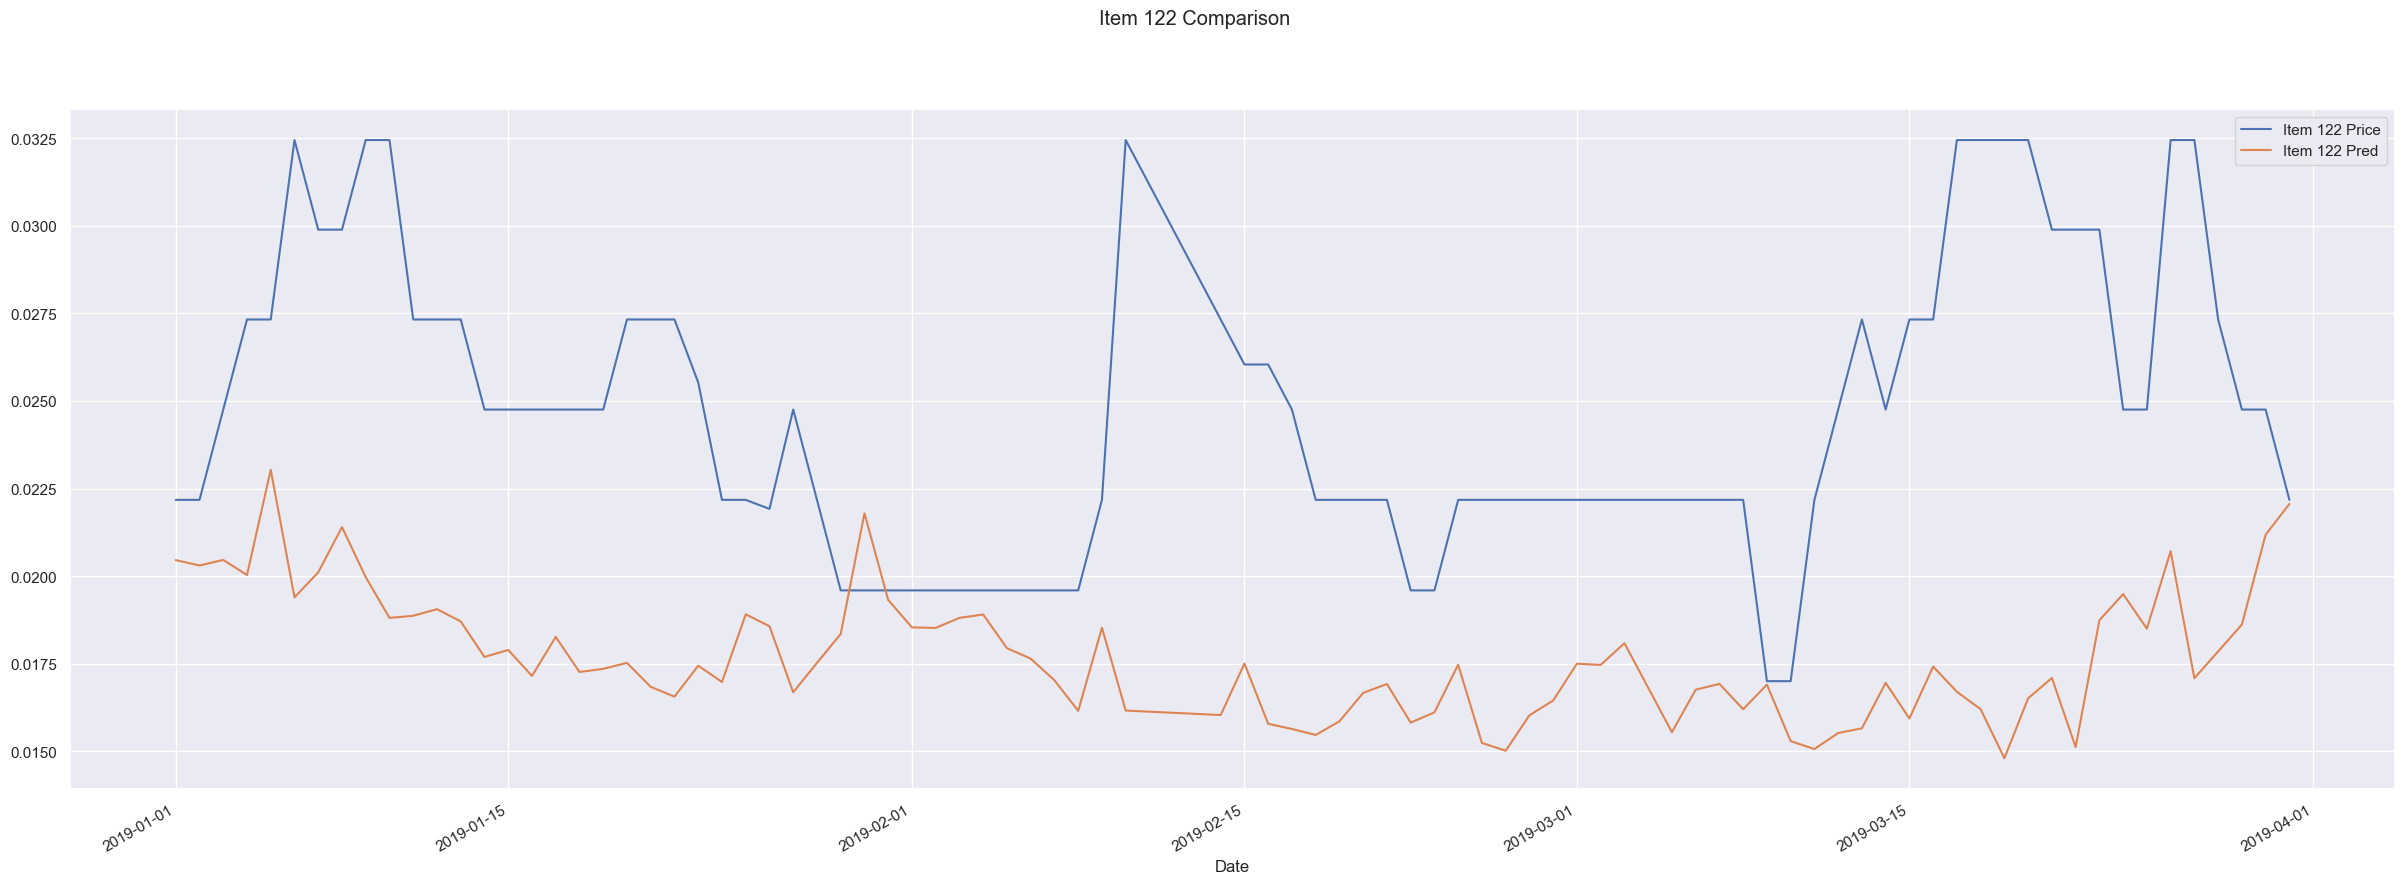

In [71]:
item = int(input("Enter the item number"))
fig= plt.subplots(figsize=(30,10))
sub = error1[error1.Item == item].set_index("Date")
sub.actual.plot(legend=True, label="Item " + str(item) + " Price")
sub.pred.plot(legend=True, label="Item " + str(item) + " Pred")
plt.suptitle("Item " + str(item) + " Comparison")
plt.show()

Prediction vs Actual XGBoost

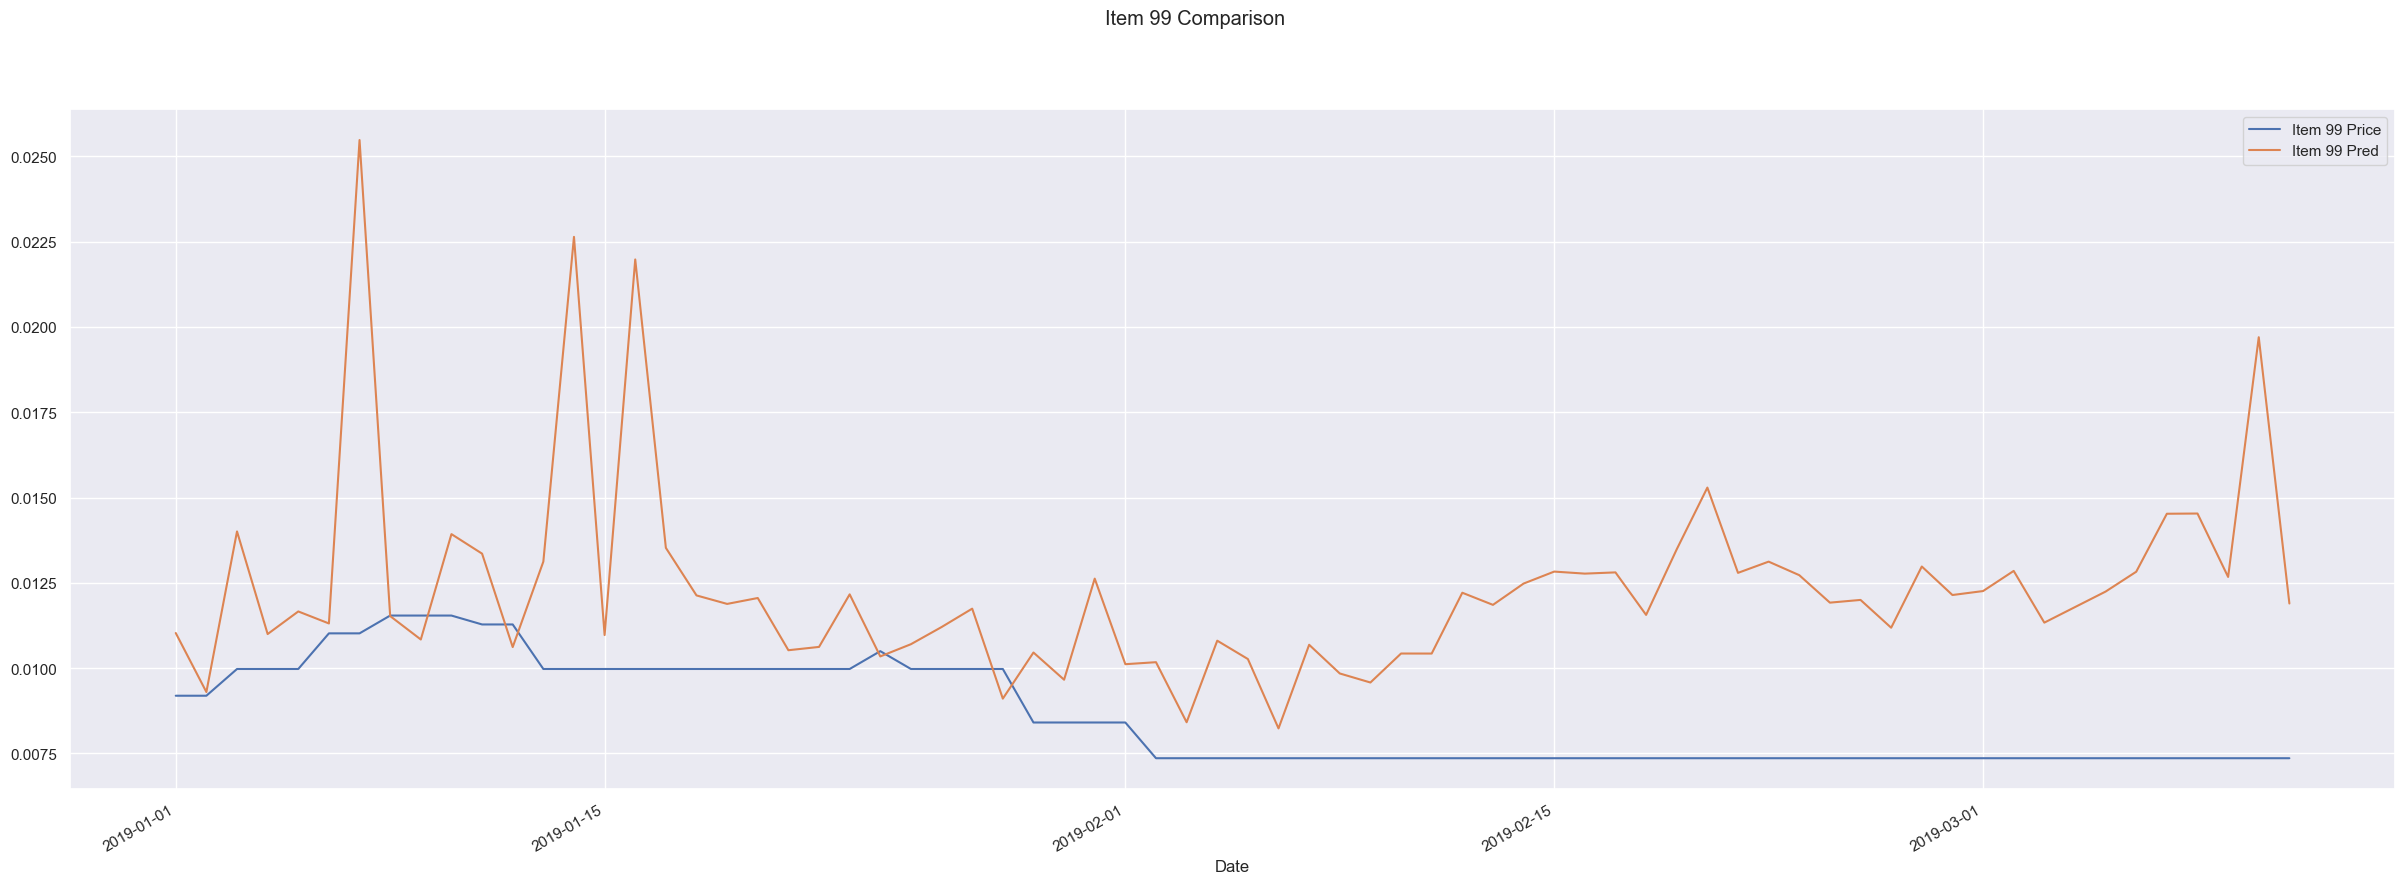

In [73]:
item = int(input("Enter the item number"))
fig= plt.subplots(figsize=(30,10))
sub = error3[error3.Item == item].set_index("Date")
sub.actual.plot(legend=True, label="Item " + str(item) + " Price")
sub.pred.plot(legend=True, label="Item " + str(item) + " Pred")
plt.suptitle("Item " + str(item) + " Comparison")
plt.show()

LSTM

In [74]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [75]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

dx_train_scaled = scaler_x.fit_transform(dx_train)
dx_test_scaled = scaler_x.transform(dx_test)

dy_train_scaled = scaler_y.fit_transform(dy_train.values.reshape(-1, 1))
dy_test_scaled = scaler_y.transform(dy_test.values.reshape(-1, 1))

In [94]:
seq_length = 5
train_generator = TimeseriesGenerator(dx_train_scaled, dy_train_scaled, length=seq_length, batch_size=32)
val_generator = TimeseriesGenerator(dx_test_scaled, dy_test_scaled, length=seq_length, batch_size=32)

In [95]:
print(f"Number of training samples: {len(train_generator)}")
print(f"Number of validation samples: {len(val_generator)}")

Number of training samples: 3444
Number of validation samples: 1476


In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [97]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, dx_train_scaled.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [98]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 50)          │        23,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,851 (171.29 KB)

 Trainable params: 43,851 (171.29 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history = model.fit(train_generator, epochs=6, validation_data=val_generator)

Epoch 1/6
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 2/6
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 3/6
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 4/6
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 5/6
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/6
3444/3444 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - loss: 0.0040 - val_loss: 0.0039


Evaluate the model

In [100]:
# Predictions
y_train_pred = model.predict(train_generator)
y_val_pred = model.predict(val_generator)

3444/3444 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
1476/1476 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


In [101]:

# Inverse scaling
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_val_pred = scaler_y.inverse_transform(y_val_pred)
y_train_actual = scaler_y.inverse_transform(dy_train_scaled)
y_val_actual = scaler_y.inverse_transform(dy_test_scaled)

Plot Error

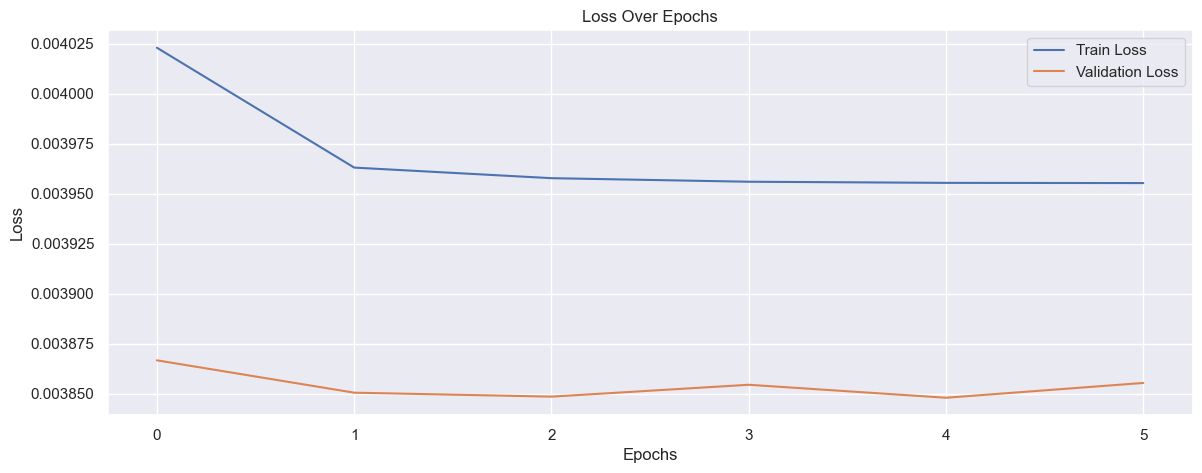

In [102]:
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
val_start_index = seq_length
val_end_index = len(val.Date)

In [105]:
print("Length of validation dates:", len(val.Date))
print("Length of predictions:", len(y_val_pred))

Length of validation dates: 5868
Length of predictions: 47227


In [106]:
# Adjust the length of validation dates to match predictions
adjusted_dates = val.Date.iloc[seq_length:seq_length + len(y_val_pred)]


In [108]:
print("Length of adjusted_dates:", len(adjusted_dates))
print("Length of y_val_actual:", len(y_val_actual))
print("Length of y_val_pred:", len(y_val_pred))


Length of adjusted_dates: 5863
Length of y_val_actual: 47232
Length of y_val_pred: 47227


In [111]:
y_val_actual = y_val_actual[:len(y_val_pred)]


In [112]:
adjusted_dates = adjusted_dates.iloc[:len(y_val_pred)]


In [109]:
# Slice adjusted_dates to match length of y_val_pred
if len(adjusted_dates) > len(y_val_pred):
    adjusted_dates = adjusted_dates.iloc[:len(y_val_pred)]

# Ensure y_val_actual and y_val_pred are numpy arrays for flattening
y_val_actual = np.array(y_val_actual)
y_val_pred = np.array(y_val_pred)

# Slice y_val_actual to match length of y_val_pred
if len(y_val_actual) > len(y_val_pred):
    y_val_actual = y_val_actual[:len(y_val_pred)]


In [113]:
error_df = pd.DataFrame({
    "Date": adjusted_dates.values,
    "Actual": y_val_actual.flatten(),
    "Pred": y_val_pred.flatten()
}).reset_index(drop=True)

error_df["Error"] = np.abs(error_df["Actual"] - error_df["Pred"])


ValueError: All arrays must be of the same length

In [ ]:
#Plotting Actual vs Prediction for a specific item
item = int(input("Enter the item number: "))
sub = error_df[error_df.Item == item].set_index("Date")

fig, ax = plt.subplots(figsize=(30, 10))
sub.actual.plot(legend=True, label="Item " + str(item) + " Price", ax=ax)
sub.pred.plot(legend=True, label="Item " + str(item) + " Pred", ax=ax)

plt.suptitle("Item " + str(item) + " Comparison")
plt.show()


Forecast

In [ ]:
#  train and validation set.
train = df.loc[(df["date"] < "2017-01-01"), :] # Until beginning of 2017
val = df.loc[(df["date"] >= "2017-01-01") & (df["date"] < "2018-01-01"), :] # Year of 2017

#dropping useless column
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]

Y_train = train['sales']
X_train = train[cols]

Y_val = val['sales']
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

In [ ]:
test = df.loc[(df["date"] >= "2018-01-01")]

In [ ]:

X_test = test[cols]

In [ ]:
X_test